# Data fra Library of Congress

Denne side vil indeholde alt data, som der er blevet hentet fra The Library of Congress.

## Library of Congress API

The Library of Congress tilbyder en API, hvilket muliggør direkte adgang til at hente data fra deres hjemmeside ved brug af Python. Denne API effektiviserer processen med at automatisere og visualisere data i Python. Et særligt fordelagtigt aspekt er deres generøse politik omkring mængden af data, der kan hentes hver time. Dette er afgørende, da den efterfølgende kode vil udføre mange dataforespørgsler.

Den kommende kode vil forsøge at finde ud af hvor udbredt bruget af termet "Quack Medicine" var i perioden 1865-1911. Vi mener at dette giver et indblik i hvor meget kvaksalver var en del af samtidens samfund.

In [1]:
# Når man arbejder i python er det først og fremmest vigtigt at importere de pakker som 
# er nødvendige for at køre koden. Installation af pakker gøres først i terminalen 
# ved hjælp af et program ved navn "pip". herefter skal pakkerne importeres til vores 
# dokument, det er hvad der gøres for neden.
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

Når man arbejder med en API kan der godt komme en masse errors ud. I dette tilfælde kan de ignoreres da det ikke gør noget ved det endelige resultat

In [2]:
# Her bruges request pakken til at hente data fra loc.gov, hvoefter der
# Oprettes en løkke for at indsamle data for hvert år inden for den angivne 
# tidsramme. 
def get_quack_medicine_mentions(year):
    try:
        url = f"http://chroniclingamerica.loc.gov/search/pages/results/?proxtext=quack+medicine&dateFilterType=yearRange&date1={year}&date2={year}&format=json"
        response = requests.get(url).json()
        total_items = response['totalItems']
    except Exception as e:
        total_items = 0
    return total_items

mentions_by_year = {}
for year in range(1865, 1912):
    total_mentions = get_quack_medicine_mentions(year)
    mentions_by_year[year] = total_mentions


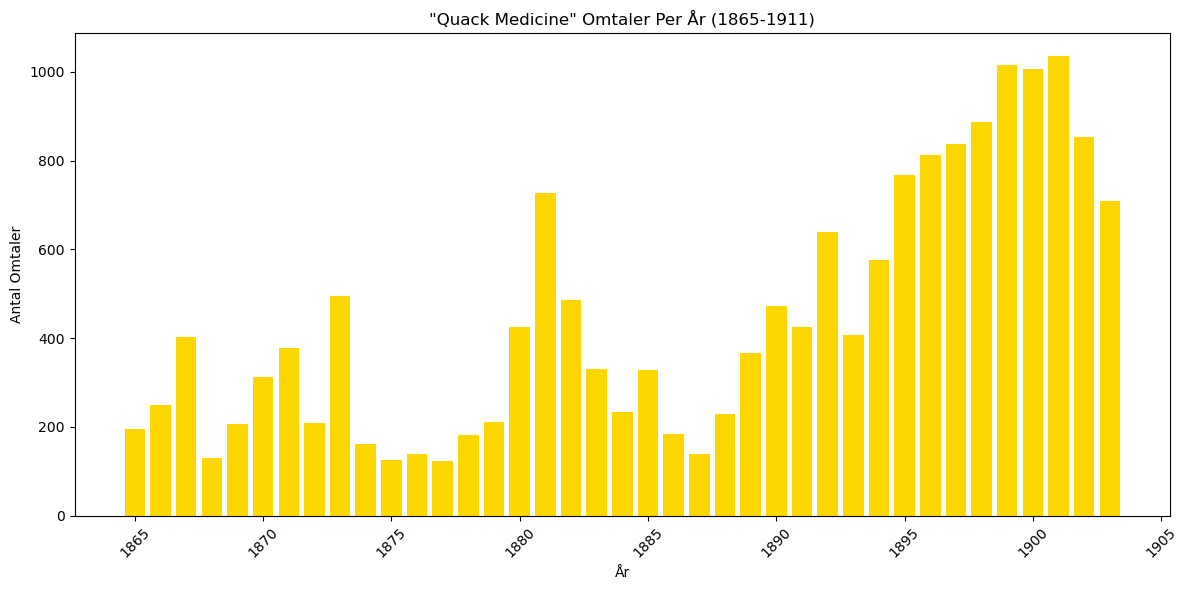

In [6]:
# Med dataen indsamlet kan der ny skabes et søjlediagram med pakken matplotlib
years = list(mentions_by_year.keys())
mentions = list(mentions_by_year.values())

plt.figure(figsize=(12, 6))
plt.bar(years, mentions, color='gold')
plt.xlabel('År')
plt.ylabel('Antal Omtaler')
plt.title('"Quack Medicine" Omtaler Per År (1865-1911)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Man kan tydeligt se, at omtalen onkring kvakmedicin er mere udbredt jo senere det er. De to store søjle man ser mellem 1900 og 1910 er højst sandsynligt i sammenhæng med FDA og den senere lov i 1906. 

## Digitaliserede Aviser

Library of congress har digitaliseret lidt over 20.000.000 avissider indtil nu, hvori de yderligere har lavet en liste over hvor mange aviser de har til rødighed af hver avis og hvornår avisen blev uddgivet. (<a href="https://chroniclingamerica.loc.gov/newspapers/">Link til kilde</a>) Dette datasæt vil vi bruge til at finde ud af hvor mange aviser der cirkulerede i USA gennem vores periode. Deres data er selvfølgelig ikke komplet, men vi mener stadig at det giver et godt indblik. For at bruge dataen skal den gøres læselig for python, derfor har vi taget dataen fra loc.gov og eksporteret det som en excel fil. Hvis den kommende kode øsnkes at replikeres skal man downloade den nedenstående fil:

<a href="https://github.com/DivEden/Quacks/blob/e5ce58cf9046a2a8efb6e390004ffcce053ab3e6/aviser.xlsx" download="aviser.xlsx">Download Excel Fil</a>


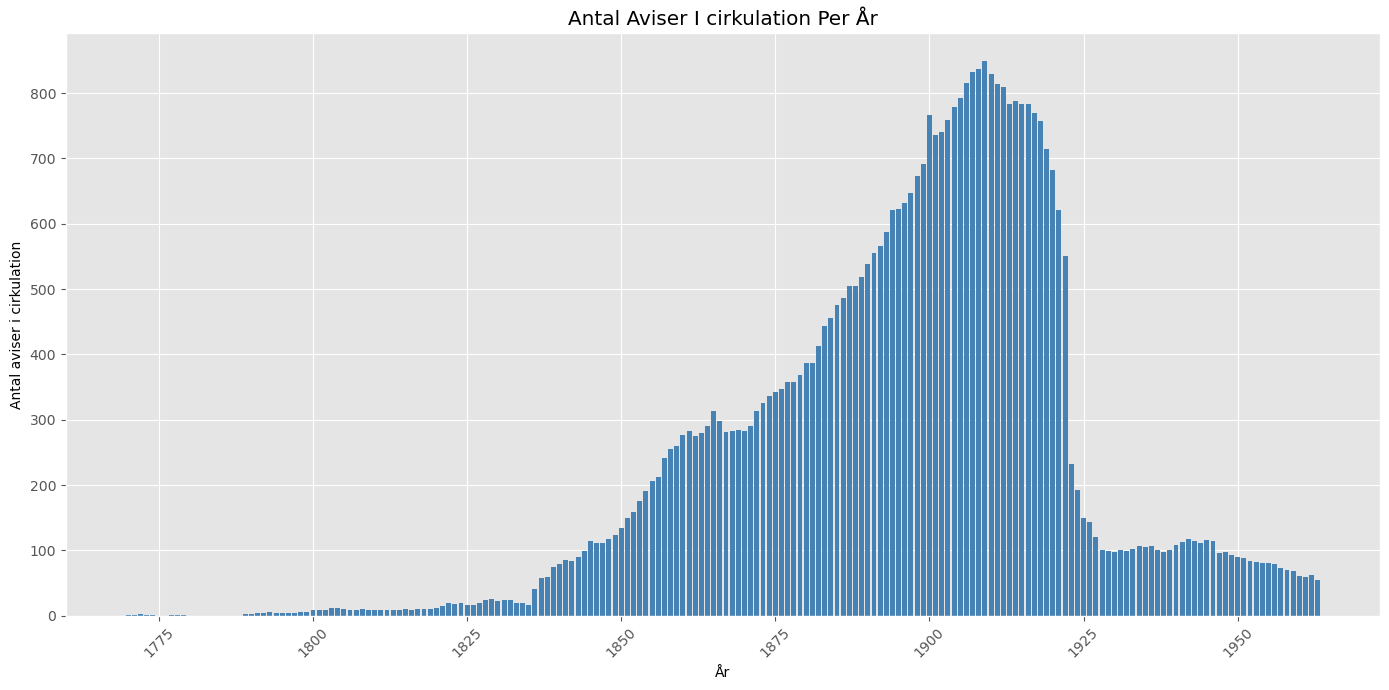

In [ ]:
# Først hentes dataen fra xlsx dokumentet
file_path = 'aviser.xlsx'
data = pd.read_excel(file_path)

# Udfylder manglende værdier i 'State' og 'Newspaper' kolonner og konverterer datoer i 'Earliest Issue' og 'Latest Issue'
data['State'] = data['State'].ffill()
data['Newspaper'] = data['Newspaper'].ffill()

data = data.dropna(subset=['Earliest Issue', 'Latest Issue'])

data['Earliest Issue'] = pd.to_datetime(data['Earliest Issue'])
data['Latest Issue'] = pd.to_datetime(data['Latest Issue'])

# Her beregnes antallet af aviser i cirkulation for hvert år
circulation_per_year = {}

for index, row in data.iterrows():
    range_of_years = list(range(row['Earliest Issue'].year, row['Latest Issue'].year + 1))
    for year in range_of_years:
        circulation_per_year[year] = circulation_per_year.get(year, 0) + 1

# Herefter sorteres dataen efter år hvorefter det kan indsættes i et søjlediagram
circulation_df = pd.DataFrame(list(circulation_per_year.items()), columns=['Year', 'Newspapers in Circulation']).sort_values(by='Year')


plt.style.use('ggplot')

plt.figure(figsize=(14,7))
plt.bar(circulation_df['Year'], circulation_df['Newspapers in Circulation'], color='steelblue')
plt.title('Antal Aviser I cirkulation Per År')
plt.xlabel('År')
plt.ylabel('Antal aviser i cirkulation')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


For at læse denne graf er der få ting som er vigtige at påpege. Vi ser et fald i aviser i omkring år 1920, dette er ikke fordi der bliver læst mindre aviser, men fordi LOC kun kan digitalisere aviser som ikke er beskyttet af ophavsret. 